In [10]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read in data 
%matplotlib inline
df = pd.read_csv('C:/Users/GAUGE COMPUTER/Downloads/archive/survey_results_public.csv')

df.head()


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.index

RangeIndex(start=0, stop=51392, step=1)

In [12]:
display(df.columns.tolist())

['Respondent',
 'Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation',
 'MajorUndergrad',
 'HomeRemote',
 'CompanySize',
 'CompanyType',
 'YearsProgram',
 'YearsCodedJob',
 'YearsCodedJobPast',
 'DeveloperType',
 'WebDeveloperType',
 'MobileDeveloperType',
 'NonDeveloperType',
 'CareerSatisfaction',
 'JobSatisfaction',
 'ExCoderReturn',
 'ExCoderNotForMe',
 'ExCoderBalance',
 'ExCoder10Years',
 'ExCoderBelonged',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExCoderActive',
 'PronounceGIF',
 'ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'JobSeekingStatus',
 'HoursPerWeek',
 'LastNewJob',
 'AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobT

# 1) DOES SALARY HAVE AN EFFECT ON CAREER SATISFACTION?

We need to know the relationship between career satisfaction , in order to determine if they would be good metrics for success for the stackflow survey's software developers

In [13]:
#Data Preparation, Selecting relevant columns
cols = ['Respondent', 'University','EmploymentStatus','FormalEducation','MajorUndergrad','CareerSatisfaction','JobSatisfaction','Salary']
df_cols = df[cols]
df_cols.head()

,Respondent,University,EmploymentStatus,FormalEducation,MajorUndergrad,CareerSatisfaction,JobSatisfaction,Salary
0,1,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN
1,2,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,NaN,NaN,NaN
2,3,No,Employed full-time,Bachelor's degree,Computer science or software engineering,8.0,9.0,113750.0
3,4,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,6.0,3.0,NaN
4,5,No,Employed full-time,Master's degree,Computer science or software engineering,6.0,8.0,NaN


In [14]:
# Cleaning out the data , dropping rows with empty data
df_selectedcols = df_cols.dropna(how = 'any')

In [15]:
df_selectedcols.head()

,Respondent,University,EmploymentStatus,FormalEducation,MajorUndergrad,CareerSatisfaction,JobSatisfaction,Salary
2,3,No,Employed full-time,Bachelor's degree,Computer science or software engineering,8.0,9.0,113750.0
14,15,No,Employed full-time,Professional degree,Computer engineering or electrical/electronics...,8.0,8.0,100000.0
17,18,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,9.0,8.0,130000.0
18,19,No,Employed full-time,Bachelor's degree,Computer science or software engineering,5.0,3.0,82500.0
22,23,No,Employed full-time,Bachelor's degree,Computer engineering or electrical/electronics...,8.0,9.0,100764.0


In [16]:
df2= ['CareerSatisfaction','Salary']
df2_cols=df[df2]
df2_cols.head()

,CareerSatisfaction,Salary
0,NaN,NaN
1,NaN,NaN
2,8.0,113750.0
3,6.0,NaN
4,6.0,NaN


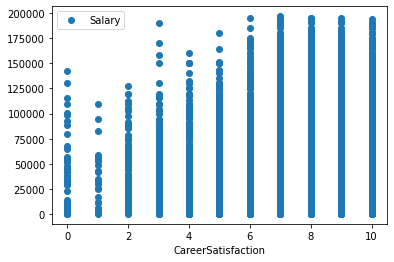

In [17]:
# Checking the relationship of CareerSatisfaction and Salary
df2_cols.plot(x='CareerSatisfaction', y='Salary', style='o')

d = {'CareerSatisfaction' : np.random.rand(10),
     'Salary' : np.random.rand(10)}

df2 = pd.DataFrame(d)


# As shown in the figure/plot above, Salary has an impact on the Career Satisfaction of software developers

# 2. DO YOU NEED TO ATTEND A UNIVERSITY BEFORE BECOMING A SUCCESSFUL SOFTWARE DEVELOPER?¶


In [18]:
df_cols['University'].value_counts()

No                     37543
Yes, full-time          9369
Yes, part-time          3352
I prefer not to say     1128
Name: University, dtype: int64

<AxesSubplot:>

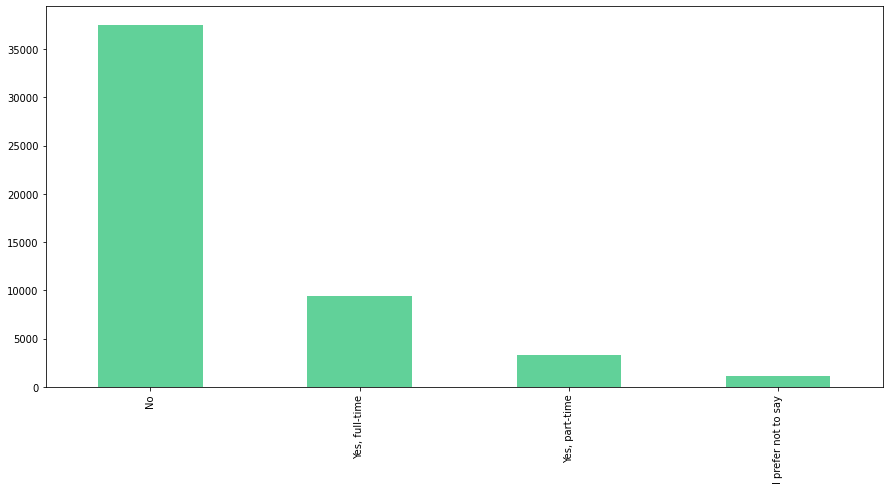

In [19]:
df_cols['University'].value_counts().plot(kind="bar", figsize=(15,7), color="#61d199")

# OVER 37000 DEVS DID NOT ATTEND UNIVERSITY

In [20]:
df_cols[(df_cols['EmploymentStatus'] == 'Employed full-time')].shape

(36148, 8)

# Over 36000 Devs are Employed Fulltime

In [21]:
university=(df_cols['University'] == 'No')
employed=(df_cols['EmploymentStatus'] == 'Employed full-time')
dev_nem=df_cols[university & employed ]#devs employed full time that didnt attend university

dev_nem

,Respondent,University,EmploymentStatus,FormalEducation,MajorUndergrad,CareerSatisfaction,JobSatisfaction,Salary
2,3,No,Employed full-time,Bachelor's degree,Computer science or software engineering,8.0,9.0,113750.0
3,4,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,6.0,3.0,NaN
4,5,No,Employed full-time,Master's degree,Computer science or software engineering,6.0,8.0,NaN
6,7,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,7.0,6.0,NaN
7,8,No,Employed full-time,Master's degree,Computer science or software engineering,7.0,7.0,NaN
...,...,...,...,...,...,...,...,...
51386,51387,No,Employed full-time,Some college/university study without earning ...,Something else,7.0,4.0,NaN
51387,51388,No,Employed full-time,Bachelor's degree,A social science,7.0,3.0,58000.0
51389,51390,No,Employed full-time,Some college/university study without earning ...,"Information technology, networking, or system ...",10.0,10.0,NaN
51390,51391,No,Employed full-time,Bachelor's degree,Computer science or software engineering,6.0,7.0,40000.0


Only 30,000 Devs employed full time that did not attend university.

In [22]:
dev_nem.shape[0] / df.shape[0] 

0.5836706102117061

# ANS: NO, 58% OF THOSE WHO TOOK THE SURVEY SATISFY THIS REQUIREMENT

In [23]:
dev_sad= df_cols[(df_cols['CareerSatisfaction'] <=4.0) & university  & employed]

dev_satisfied = df_cols[(df_cols['CareerSatisfaction'] == 5.0) & university  & employed]

dev_happy = df_cols[(df_cols ['CareerSatisfaction'] >=6.0) &  university & employed ]

In terms of Career Satisfaction

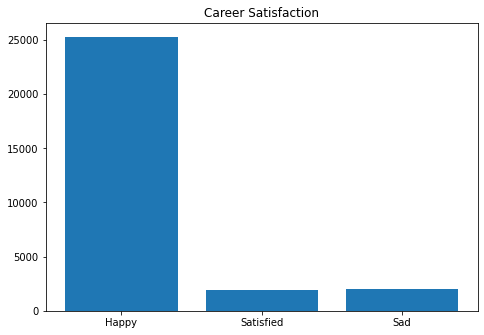

In [786]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
satisfaction = ['Happy', 'Satisfied','Sad']
num = [len(dev_happy), len(dev_satisfied), len(dev_sad)]
ax.bar(satisfaction, num)
ax.set_title('Career Satisfaction')
plt.show()

# ABOUT 25000 OUT OF THE 30000 FULL TIME EMPLOYED DEVS WHO DID NOT ATTEND UNIVERSITY ARE HAPPY WITH THEIR JOBS

In [24]:
dev_happy.shape[0]/dev_nem.shape[0]

0.8431790905454061

# 84% of the developers that did not attend university and are employed full time are happy with their jobs.

# When it comes to Salaries...

In [27]:
dev = df_cols[(df_cols['CareerSatisfaction']>=1.0) &  university & employed ]
dev['Salary'].mean()

60198.957157869925

# THESE DEVELOPERS WALK HOME WITH AN AVERAGE OF OVER $60,000.

In terms of Career Satisfaction for those that attended university full time

In [28]:
university2=(df_cols['University'] != 'No')
university3=(df_cols['University'] != 'I prefer not to say')
employed=(df_cols['EmploymentStatus'] == 'Employed full-time')
dev_nem2=df_cols[university2 & university3 & employed ]#devs employed full time that  attended university

dev_nem2

,Respondent,University,EmploymentStatus,FormalEducation,MajorUndergrad,CareerSatisfaction,JobSatisfaction,Salary
8,9,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,6.0,6.0,NaN
17,18,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,9.0,8.0,130000.000000
30,31,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,8.0,7.0,NaN
31,32,"Yes, part-time",Employed full-time,Some college/university study without earning ...,Computer science or software engineering,7.0,8.0,NaN
34,35,"Yes, full-time",Employed full-time,Bachelor's degree,Computer engineering or electrical/electronics...,10.0,8.0,14838.709677
...,...,...,...,...,...,...,...,...
51339,51340,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,8.0,8.0,NaN
51342,51343,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Information technology, networking, or system ...",10.0,6.0,NaN
51346,51347,"Yes, full-time",Employed full-time,Bachelor's degree,Computer engineering or electrical/electronics...,10.0,10.0,NaN
51372,51373,"Yes, full-time",Employed full-time,Secondary school,NaN,7.0,7.0,NaN


5688 DEVS attended university both full time and part time and are employed

In [29]:
dev_sad2=  df_cols[(df_cols['CareerSatisfaction'] <=4.0) & university2 & university3  & employed]

dev_satisfied2 = df_cols[(df_cols['CareerSatisfaction'] == 5.0) & university2 & university3  & employed]

dev_happy2 = df_cols[(df_cols ['CareerSatisfaction'] >=6.0) &  university2 & university3 & employed ]

In [30]:
dev_nem2.shape[0] / df.shape[0]

0.11067870485678705

# 11% of Developers went to University and are employed either part time or full time

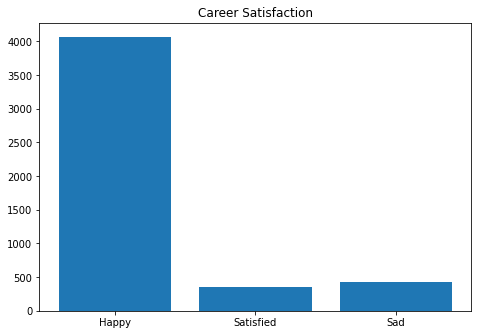

In [31]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
satisfaction2 = ['Happy', 'Satisfied','Sad']
num2 = [len(dev_happy2), len(dev_satisfied2), len(dev_sad2)]
ax2.bar(satisfaction2, num2)
ax2.set_title('Career Satisfaction')
plt.show()

# ABOUT 4000 OUT OF 5688 FULL TIME EMPLOYED DEVS WHO ATTENDED UNIVERSITY ARE HAPPY WITH THEIR JOBS

In [32]:
dev_happy2.shape[0]/dev_nem2.shape[0]

0.7162447257383966

# 72% of the developers who attended University are happy /satisfied with their jobs

In [791]:
dev_part = df_cols[(df_cols['CareerSatisfaction']>=1.0) &  university2 &university3 & employed ]
dev_part['Salary'].mean()V

36229.716045887726

#### AN AVERAGE OF $36000

# 3) HOW EFFECTIVE IS WORKING REMOTELY AS A SOFTWARE DEVELOPER.

 We would also use Career Satisfaction and salary as metrics , job satisfaction would be included as well

In [34]:
cols2= ['Respondent','EmploymentStatus','University','HomeRemote','CareerSatisfaction', 'JobSatisfaction','Salary']
df_selectedcols2= df[cols2].dropna(how='any')
df_selectedcols2.head()

,Respondent,EmploymentStatus,University,HomeRemote,CareerSatisfaction,JobSatisfaction,Salary
2,3,Employed full-time,No,"Less than half the time, but at least one day ...",8.0,9.0,113750.0
14,15,Employed full-time,No,All or almost all the time (I'm full-time remote),8.0,8.0,100000.0
17,18,Employed full-time,"Yes, part-time",All or almost all the time (I'm full-time remote),9.0,8.0,130000.0
18,19,Employed full-time,No,A few days each month,5.0,3.0,82500.0
22,23,Employed full-time,No,A few days each month,8.0,9.0,100764.0


In [35]:
df_selectedcols2['HomeRemote'].value_counts()

A few days each month                                      5096
Never                                                      4283
Less than half the time, but at least one day each week    1261
All or almost all the time (I'm full-time remote)           894
It's complicated                                            646
About half the time                                         334
More than half, but not all, the time                       326
Name: HomeRemote, dtype: int64

<AxesSubplot:>

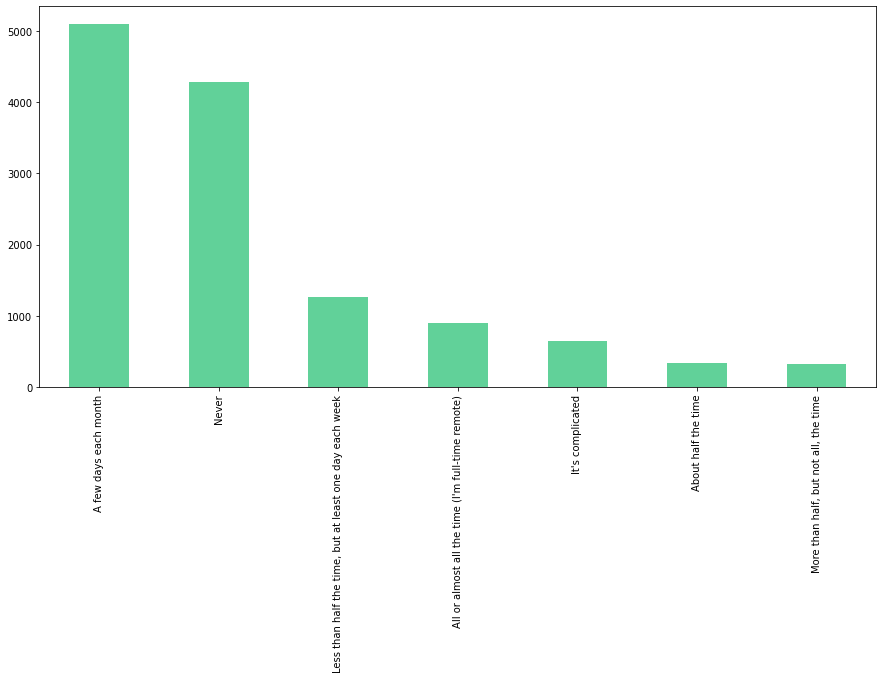

In [41]:
df_selectedcols2['HomeRemote'].value_counts().plot(kind="bar", figsize=(15,7), color="#61d199")

In [42]:
df['Salary'].mean()

56298.480640629256

In [44]:
df['CareerSatisfaction'].mean()

7.300573837685912

In [49]:
df['JobSatisfaction'].mean()

6.957078462452943

In [45]:
df_HR1 = df_selectedcols2[(df_selectedcols2['HomeRemote'] =='All or almost all the time (I\'m full-time remote)')]
df_HR2 = df_selectedcols2[(df_selectedcols2['HomeRemote'] =='More than half, but not all, the time')]
df_HR3 = df_selectedcols2[(df_selectedcols2['HomeRemote'] =='About half the time')]
df_HR4 = df_selectedcols2[(df_selectedcols2['HomeRemote'] == 'Less than half the time, but at least one day each week')]
df_HR5 = df_selectedcols2[(df_selectedcols2['HomeRemote'] == 'A few days each month')]   
df_HR6 = df_selectedcols2[(df_selectedcols2['HomeRemote'] == 'It\'s complicated' )]
df_HR7 = df_selectedcols2[(df_selectedcols2['HomeRemote'] ==  'Never')]

In [50]:
a_HR = df_HR1[(df_HR1['Salary']>=56000)] 
b_HR = df_HR2[(df_HR2['Salary']>=56000)]
c_HR = df_HR3[(df_HR3['Salary']>=56000)]
d_HR = df_HR4[(df_HR4['Salary']>=56000)]
e_HR = df_HR5[(df_HR5['Salary']>=56000)]
f_HR = df_HR6[(df_HR6['Salary']>=56000)]
g_HR = df_HR7[(df_HR7['Salary']>=56000)]

In [69]:
dev_HR = a_HR[(a_HR['CareerSatisfaction']>=7)&(a_HR['JobSatisfaction']>=7)]
dev_HR1 = b_HR[(b_HR['CareerSatisfaction']>=7)&(b_HR['JobSatisfaction']>=7)]
dev_HR2 = c_HR[(c_HR['CareerSatisfaction']>=7)&(c_HR['JobSatisfaction']>=7)]
dev_HR3 = d_HR[(d_HR['CareerSatisfaction']>=7)&(d_HR['JobSatisfaction']>=7)]
dev_HR4 = e_HR[(e_HR['CareerSatisfaction']>=7)&(e_HR['JobSatisfaction']>=7)]
dev_HR5 = f_HR[(f_HR['CareerSatisfaction']>=7)&(f_HR['JobSatisfaction']>=7)]
dev_HR6 = g_HR[(g_HR['CareerSatisfaction']>=7)&(g_HR['JobSatisfaction']>=7)]


In [79]:
a1 = dev_HR.shape[0]/df_HR1.shape[0]
b1 = dev_HR1.shape[0]/df_HR2.shape[0]
c1 = dev_HR2.shape[0]/df_HR3.shape[0]
d1 = dev_HR3.shape[0]/df_HR4.shape[0]
e1 = dev_HR4.shape[0]/df_HR5.shape[0]
f1 = dev_HR5.shape[0]/df_HR6.shape[0]
g1 = dev_HR6.shape[0]/df_HR7.shape[0]

In [80]:
dev_HR.shape[0]/df_HR1.shape[0]

0.45302013422818793

45% of Devs who worked 'All or almost all the time (I'm full-time remote)' are successful

In [54]:
dev_HR1.shape[0]/df_HR2.shape[0]

0.2883435582822086

28% of Devs who worked 'More than half, but not all, the time' are successful.

In [55]:
dev_HR2.shape[0]/df_HR3.shape[0]

0.3263473053892216

32% of Devs who worked 'About half the time' are successful.

In [56]:
dev_HR3.shape[0]/df_HR4.shape[0]

0.3576526566217288

35% of Devs who worked 'Less than half the time, but at least one day each week' are successful

In [57]:
dev_HR4.shape[0]/df_HR5.shape[0]

0.3302590266875981

33% of Devs who worked 'A few days each month'remotely are successful

In [58]:
dev_HR5.shape[0]/df_HR6.shape[0]

0.28328173374613

28% of Devs who described working remotely 'It's complicated' are successful

In [59]:
dev_HR6.shape[0]/df_HR7.shape[0]

0.19425636236282978

19% of Devs who 'Never'  worked remotely are successful 

In [60]:
a1

0.45302013422818793

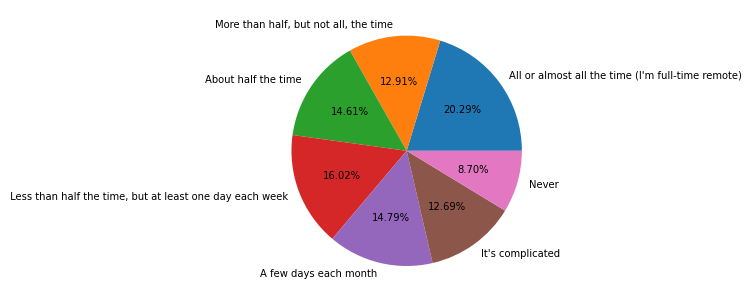

In [82]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
HomeRemote = ['All or almost all the time (I\'m full-time remote)','More than half, but not all, the time','About half the time', ' Less than half the time, but at least one day each week', 'A few days each month', 'It\'s complicated','Never']
Developers = [a1,b1,c1,d1,e1,f1,g1]
ax.pie(Developers, labels = HomeRemote, autopct='%1.2f%%')
plt.show()

# 4)PERCENTAGE OF SUCCESSFUL FEMALE SOFTWARE DEVELOPER USING CAREERSATISFACTION AND SALARY AS METRICS

In [587]:
fem =['Respondent','CareerSatisfaction','Gender','Salary']
df_fem = df[fem]

df_fem.head()

,Respondent,CareerSatisfaction,Gender,Salary
0,1,NaN,Male,NaN
1,2,NaN,Male,NaN
2,3,8.0,Male,113750.0
3,4,6.0,Male,NaN
4,5,6.0,NaN,NaN


In [588]:
df_fem2 = df_fem.dropna(how = 'any')
df_fem2.head()

,Respondent,CareerSatisfaction,Gender,Salary
2,3,8.0,Male,113750.0
14,15,8.0,Male,100000.0
17,18,9.0,Male,130000.0
22,23,8.0,Male,100764.0
25,26,7.0,Male,175000.0


In [74]:
gender=(df_fem2['Gender'] == 'Female')
CS=(df_fem2['CareerSatisfaction'] >= 6.0)
Salary = (df_fem2['Salary'] >= 100000)
dev_fem=df_fem2[gender & CS & Salary]#female devs that have high career satisfaction

dev_fem

,Respondent,CareerSatisfaction,Gender,Salary
1832,1833,7.0,Female,136000.0
2530,2531,8.0,Female,104000.0
5331,5332,9.0,Female,110000.0
5412,5413,6.0,Female,120000.0
5819,5820,7.0,Female,100000.0
...,...,...,...,...
49594,49595,6.0,Female,130000.0
49607,49608,8.0,Female,135000.0
49940,49941,6.0,Female,118000.0
51114,51115,9.0,Female,135000.0


In [75]:
dev_fem.shape[0]/df.shape[0]

0.002393368617683686

# ONLY 0.2% OF THE SOFTWARE DEVELOPERS THAT TOOK THE SURVEY ARE 'SUCCESSFUL' FEMALES

In [809]:
gender=(df_fem2['Gender'] == 'Male')
CS=(df_fem2['CareerSatisfaction'] >= 6.0)
Salary = (df_fem2['Salary'] >= 100000)
dev_fem2=df_fem2[gender & CS & Salary]#female devs that have high career satisfaction
    
dev_fem2

,Respondent,CareerSatisfaction,Gender,Salary
2,3,8.0,Male,113750.00000
14,15,8.0,Male,100000.00000
17,18,9.0,Male,130000.00000
22,23,8.0,Male,100764.00000
25,26,7.0,Male,175000.00000
...,...,...,...,...
51311,51312,9.0,Male,105400.00000
51312,51313,7.0,Male,120000.00000
51315,51316,6.0,Male,140000.00000
51319,51320,10.0,Male,105000.00000


In [808]:
dev_fem2.shape[0] / df.shape[0]

0.031230541718555417

# 3% OF THE SOFTWARE DEVELOPERS THAT TOOK THE SURVEY ARE 'SUCCESSFUL' MEN 